In [68]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-imdb-scores/Netflix TV Shows and Movies.csv


In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df = pd.read_csv("/kaggle/input/netflix-imdb-scores/Netflix TV Shows and Movies.csv")
df

,index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
0,0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,tt0075314,8.3,795222.0
1,1,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,tt0071853,8.2,530877.0
2,2,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,tt0079470,8.0,392419.0
3,3,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,tt0070047,8.1,391942.0
4,4,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,tt0063929,8.8,72895.0
...,...,...,...,...,...,...,...,...,...,...,...
5278,5278,tm1040816,Momshies! Your Soul is Mine,MOVIE,Three women with totally different lives accid...,2021,NaN,108,tt14412240,5.8,26.0
5279,5279,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,tt13857480,6.9,39.0
5280,5280,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,NaN,88,tt14620732,6.5,32.0
5281,5281,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,tt10168094,6.2,9.0


In [71]:
df.describe()

,index,release_year,runtime,imdb_score,imdb_votes
count,5283.000000,5283.000000,5283.000000,5283.000000,5.267000e+03
mean,2641.000000,2015.879992,79.199886,6.533447,2.340719e+04
std,1525.215067,7.346098,38.915974,1.160932,8.713432e+04
min,0.000000,1953.000000,0.000000,1.500000,5.000000e+00
25%,1320.500000,2015.000000,45.000000,5.800000,5.210000e+02
50%,2641.000000,2018.000000,87.000000,6.600000,2.279000e+03
75%,3961.500000,2020.000000,106.000000,7.400000,1.014400e+04
max,5282.000000,2022.000000,235.000000,9.600000,2.268288e+06


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5283 entries, 0 to 5282
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5283 non-null   int64  
 1   id                 5283 non-null   object 
 2   title              5283 non-null   object 
 3   type               5283 non-null   object 
 4   description        5278 non-null   object 
 5   release_year       5283 non-null   int64  
 6   age_certification  2998 non-null   object 
 7   runtime            5283 non-null   int64  
 8   imdb_id            5283 non-null   object 
 9   imdb_score         5283 non-null   float64
 10  imdb_votes         5267 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 454.1+ KB


**KDE plot for IMDb scores and determing the movies accordinng to the range of scores**

/tmp/ipykernel_43/3247178798.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=movies_df['imdb_score'], color='skyblue', shade=True, legend=False)


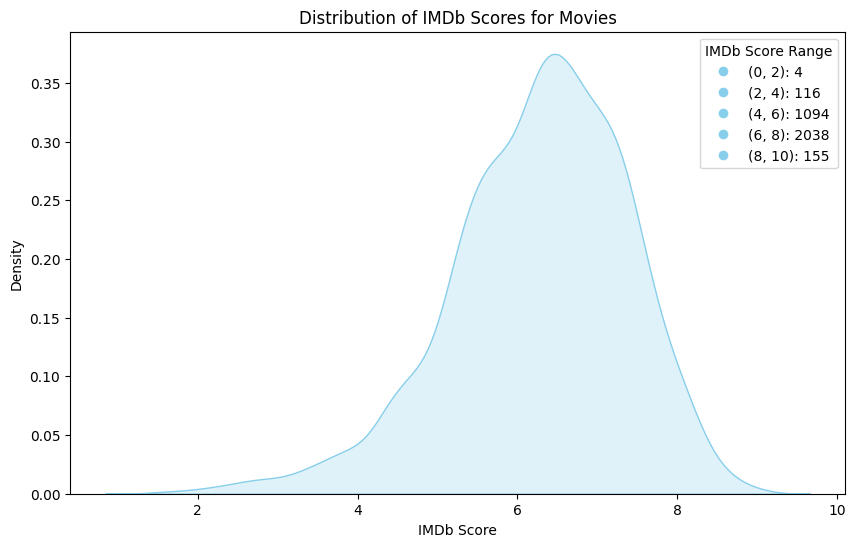

In [73]:
movies_df = df[df['type'] == 'MOVIE']

score_ranges = [(0, 2), (2, 4), (4, 6), (6, 8), (8, 10)]
counts = []
for score_range in score_ranges:
    lower_bound, upper_bound = score_range
    count = movies_df[(movies_df['imdb_score'] >= lower_bound) & (movies_df['imdb_score'] < upper_bound)].shape[0]
    counts.append(count)
plt.figure(figsize=(10, 6))
sns.kdeplot(data=movies_df['imdb_score'], color='skyblue', shade=True, legend=False)
plt.xlabel('IMDb Score')
plt.title('Distribution of IMDb Scores for Movies')
legend_labels = [f'{range_}: {count}' for range_, count in zip(score_ranges, counts)]
custom_legend = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='skyblue', markersize=8, label=label) for label in legend_labels]
plt.legend(handles=custom_legend, title='IMDb Score Range', loc='upper right')
plt.show()


**Top 10 highest IMDB rating movies**

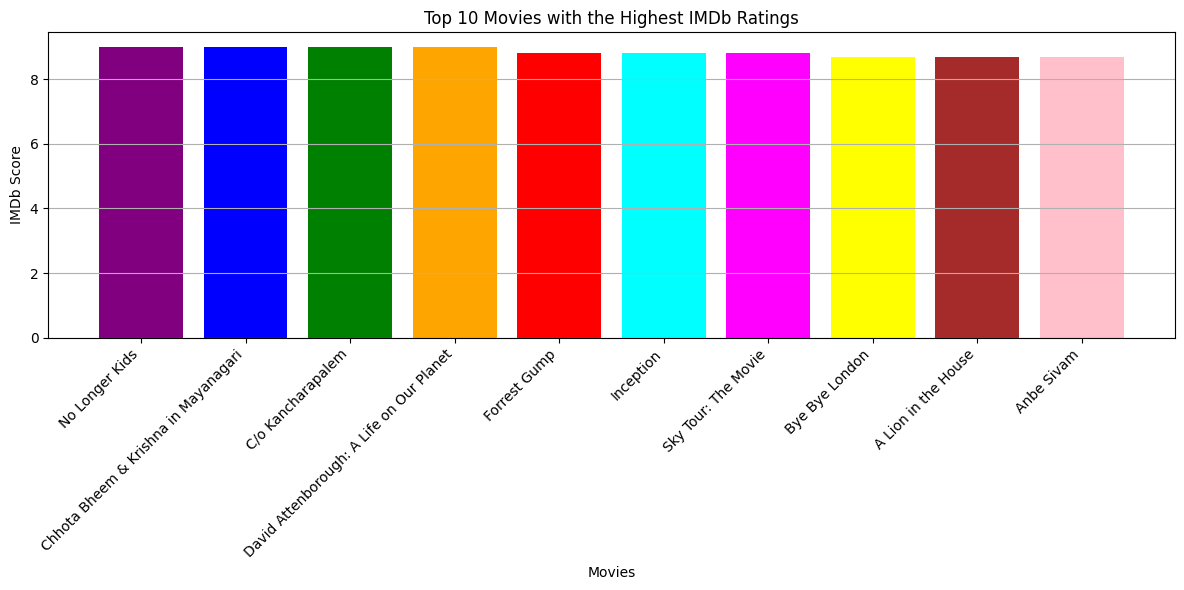

In [74]:
movies_df = df[df['type'] == 'MOVIE']
top_10_movies = movies_df.nlargest(10, 'imdb_score')
colors = ['purple', 'blue', 'green', 'orange', 'red', 'cyan', 'magenta', 'yellow', 'brown', 'pink']
plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_movies['title'], top_10_movies['imdb_score'], color=colors)
plt.xlabel('Movies')
plt.ylabel('IMDb Score')
plt.title('Top 10 Movies with the Highest IMDb Ratings')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**Top 10 highest IMDB rating shows**

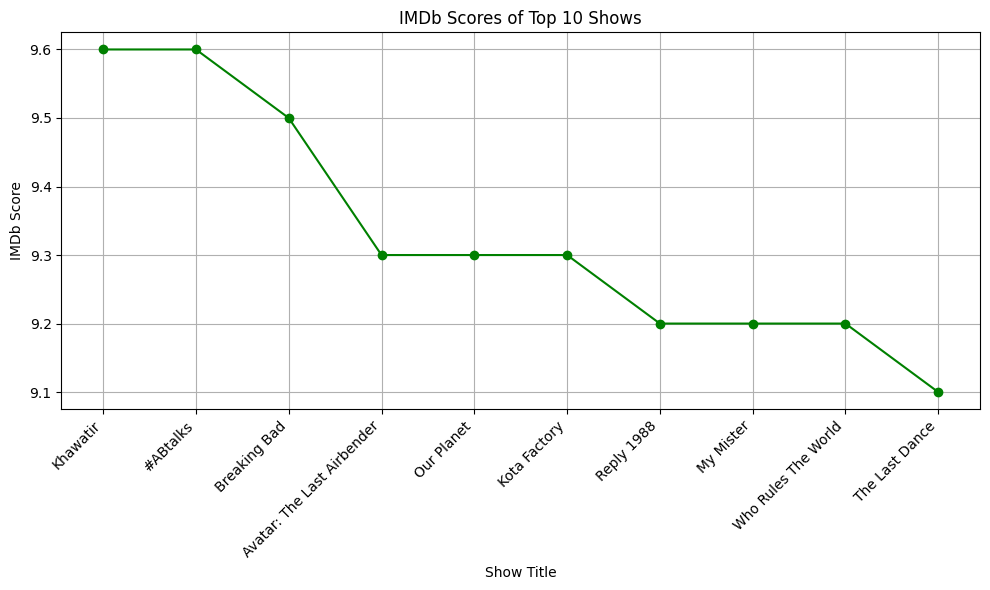

In [75]:
shows_df = df[df['type'] == 'SHOW']
top_10_shows = shows_df.nlargest(10, 'imdb_score')

plt.figure(figsize=(10, 6))
plt.plot(top_10_shows['title'], top_10_shows['imdb_score'], marker='o', linestyle='-', color='green')
plt.xlabel('Show Title')
plt.ylabel('IMDb Score')
plt.title('IMDb Scores of Top 10 Shows')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


**Pie Chart: Proportion of Different Age Certifications**

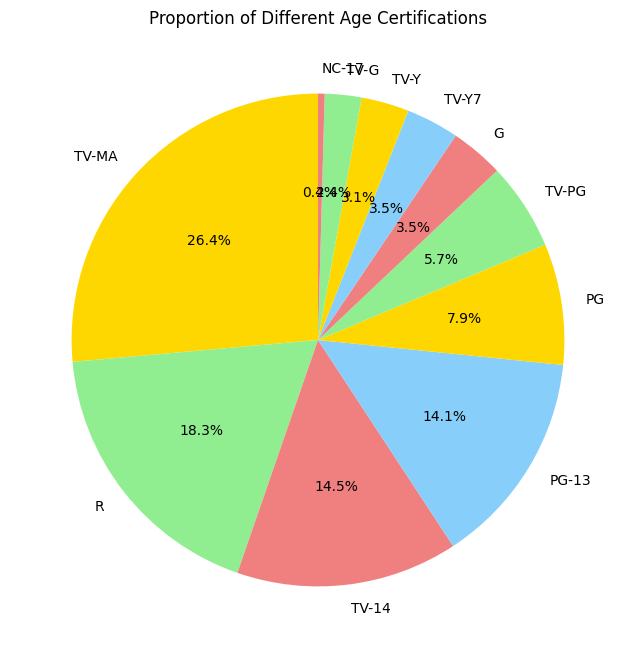

In [76]:
plt.figure(figsize=(8, 8))
certification_counts = df['age_certification'].value_counts()
certification_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['gold', 'lightgreen', 'lightcoral', 'lightskyblue'])
plt.title('Proportion of Different Age Certifications')
plt.ylabel('')
plt.show()

**Line Plot: IMDb Score Trends Over Release Years**

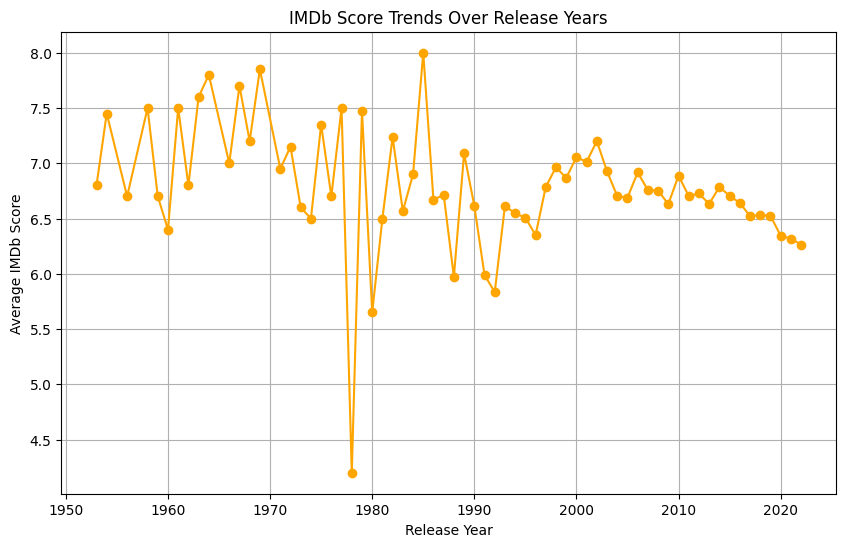

In [77]:
avg_score_by_year = df.groupby('release_year')['imdb_score'].mean()
plt.figure(figsize=(10, 6))
avg_score_by_year.plot(kind='line', marker='o', color='orange')
plt.xlabel('Release Year')
plt.ylabel('Average IMDb Score')
plt.title('IMDb Score Trends Over Release Years')
plt.grid(True)
plt.show()

**Stacked Bar Chart: IMDb Score Distribution by Type and Age Certification**

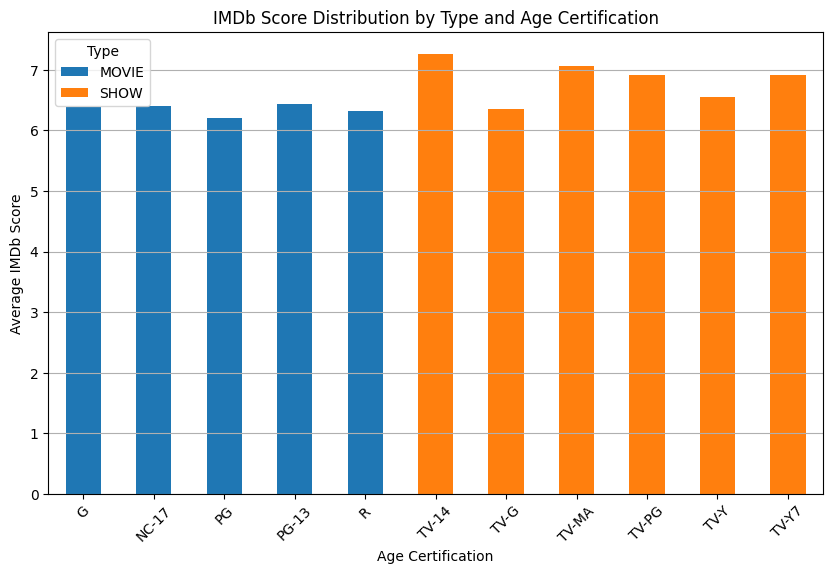

In [78]:
pivot = df.pivot_table(index='age_certification', columns='type', values='imdb_score', aggfunc='mean')
pivot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Age Certification')
plt.ylabel('Average IMDb Score')
plt.title('IMDb Score Distribution by Type and Age Certification')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.grid(axis='y')
plt.show()

**Scatter Plot: IMDb Score vs. Release Year**

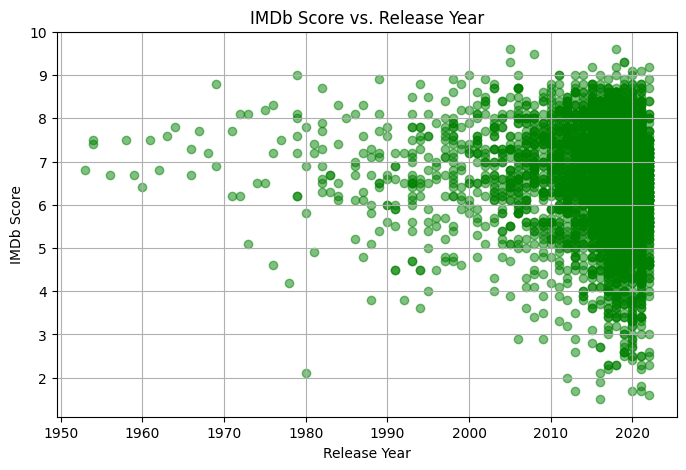

In [79]:
plt.figure(figsize=(8, 5))
plt.scatter(df['release_year'], df['imdb_score'], color='green', alpha=0.5)
plt.xlabel('Release Year')
plt.ylabel('IMDb Score')
plt.title('IMDb Score vs. Release Year')
plt.grid(True)
plt.show()

**Distribution of IMDb Scores by Age Certification**

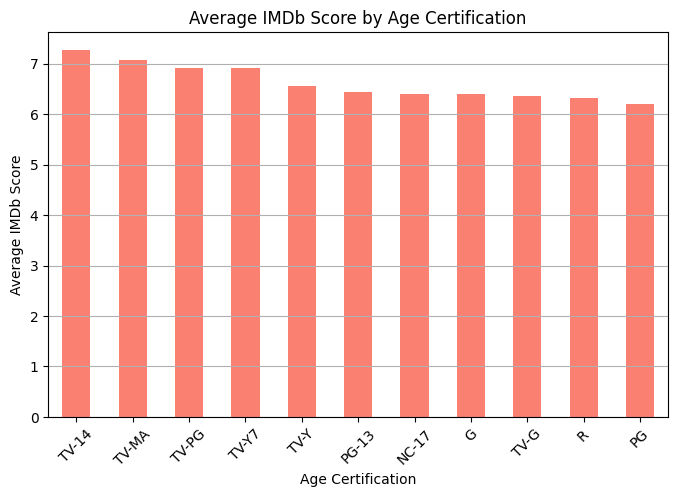

In [80]:
avg_score_by_certification = df.groupby('age_certification')['imdb_score'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
avg_score_by_certification.plot(kind='bar', color='salmon')
plt.xlabel('Age Certification')
plt.ylabel('Average IMDb Score')
plt.title('Average IMDb Score by Age Certification')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


**Comparison of IMDb Scores between Movies and Shows**

<Figure size 800x500 with 0 Axes>

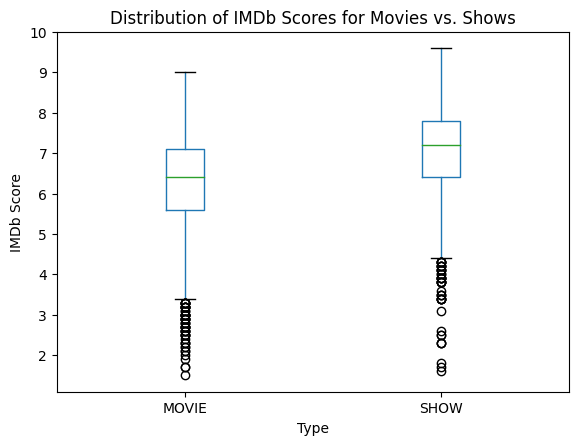

In [81]:
plt.figure(figsize=(8, 5))
df.boxplot(column='imdb_score', by='type', grid=False)
plt.xlabel('Type')
plt.ylabel('IMDb Score')
plt.title('Distribution of IMDb Scores for Movies vs. Shows')
plt.suptitle('')
plt.show()


**Pairplot for the numerical columns for the SHOW**

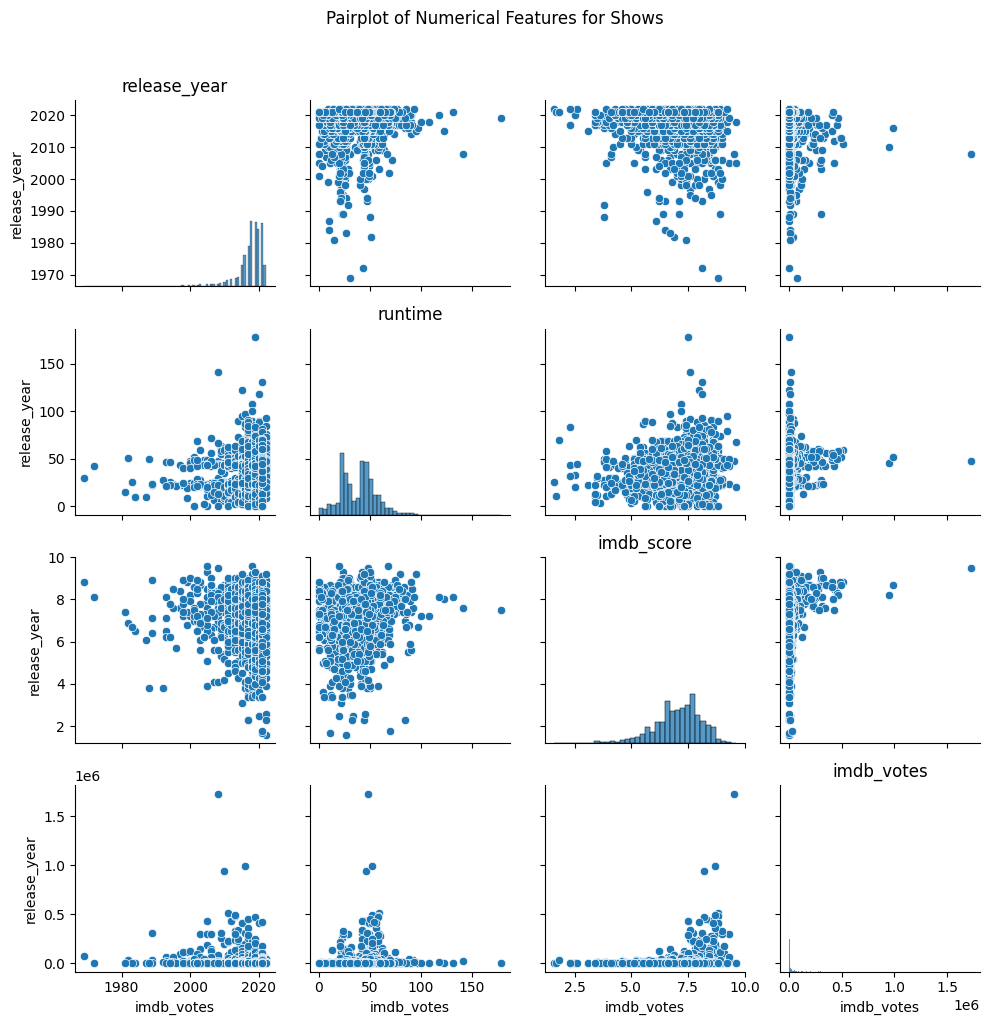

In [82]:
numerical_columns1 = ['release_year', 'runtime', 'imdb_score', 'imdb_votes']
shows_df = df[df['type'] == 'SHOW']
numerical_data_shows = shows_df[numerical_columns1]
pairplot = sns.pairplot(numerical_data_shows)
for i, col in enumerate(numerical_columns1):
    for j, row in enumerate(numerical_columns1):
        if i == j:
            pairplot.axes[j, i].set_title(col)
        else:
            pairplot.axes[j, i].set_ylabel(col)
            pairplot.axes[j, i].set_xlabel(row)
plt.suptitle('Pairplot of Numerical Features for Shows', y=1.02)
plt.tight_layout()
plt.show()


**Pairplot for the numerical columns for the Movies**

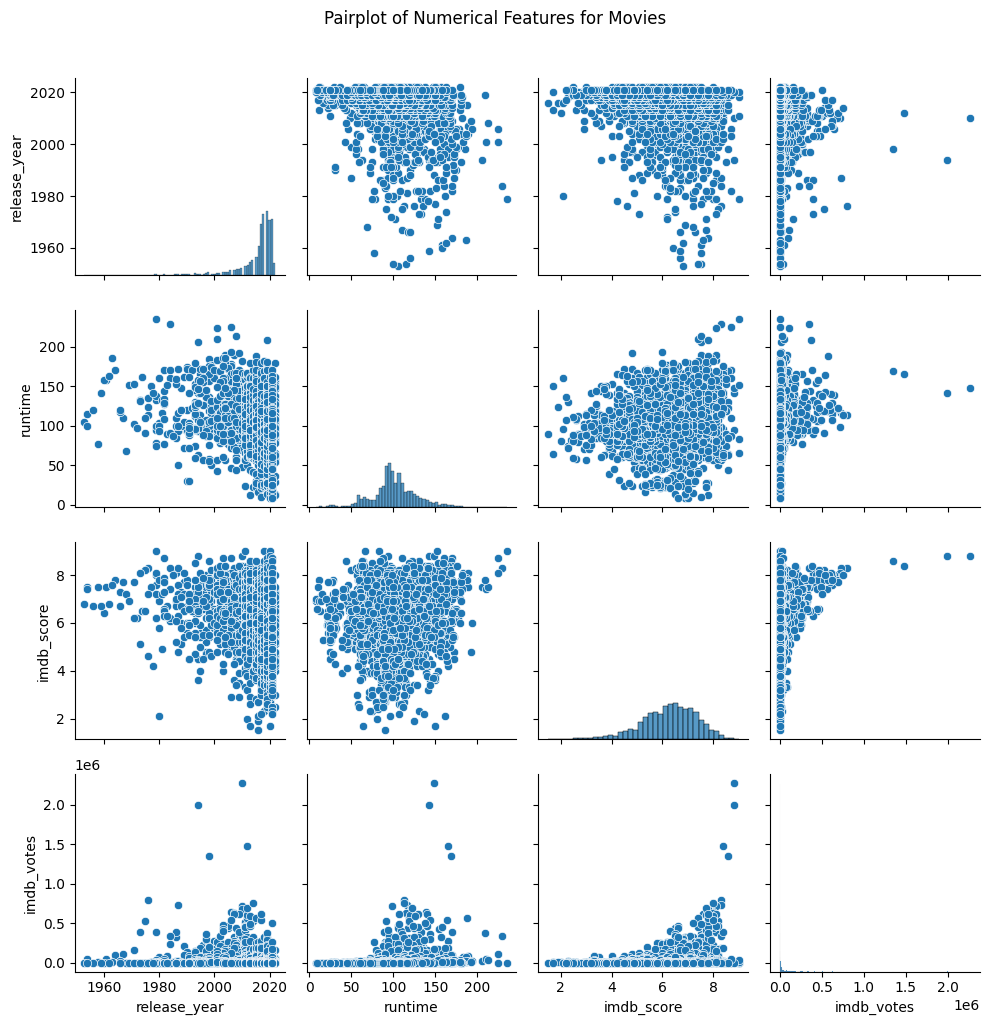

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = ['release_year', 'runtime', 'imdb_score', 'imdb_votes']
movies_df = df[df['type'] == 'MOVIE']
numerical_data = movies_df[numerical_columns]

# Creating a pairplot
pairplot = sns.pairplot(numerical_data)
pairplot.fig.suptitle('Pairplot of Numerical Features for Movies', y=1.02)
plt.tight_layout()
plt.show()
